<h3>Importing all the required libraries</h3>

In [1]:
import pandas as pd
from scipy.io import arff
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

In [2]:
plt.rcParams['font.family'] = 'Ubuntu Mono'

<h3>Loading Census Data into Pandas Dataframe</h3>

In [3]:
census_data = arff.loadarff('Datasets/census-income-full-nominal.arff')
census_data_df= pd.DataFrame(census_data[0])
census_data_df.head()

,att2,att3,att4,att5,att7,att8,att9,att10,att11,att12,...,att32,att33,att34,att35,att36,att37,att38,att39,att41,class
0,b'Not-in-universe',b'0',b'0',b'Bachelors-degree(BA-AB-BS)',b'Not-in-universe',b'Married-civilian-spouse-present',b'Not-in-universe-or-children',b'Not-in-universe',b'White',b'All-other',...,b'Not-in-universe',b'United-States',b'United-States',b'United-States',b'Native--Born-in-the-United-States',b'0',b'Not-in-universe',b'2',b'94',b'--50000.'
1,b'Private',b'29',b'32',b'Bachelors-degree(BA-AB-BS)',b'Not-in-universe',b'Never-married',b'Transportation',b'Other-service',b'White',b'All-other',...,b'Not-in-universe',b'United-States',b'United-States',b'United-States',b'Native--Born-in-the-United-States',b'0',b'Not-in-universe',b'2',b'95',b'--50000.'
2,b'Not-in-universe',b'0',b'0',b'High-school-graduate',b'Not-in-universe',b'Married-civilian-spouse-present',b'Not-in-universe-or-children',b'Not-in-universe',b'White',b'All-other',...,b'Not-in-universe',b'United-States',b'United-States',b'United-States',b'Native--Born-in-the-United-States',b'0',b'Not-in-universe',b'2',b'95',b'--50000.'
3,b'Not-in-universe',b'0',b'0',b'Children',b'Not-in-universe',b'Never-married',b'Not-in-universe-or-children',b'Not-in-universe',b'White',b'All-other',...,b'Both-parents-present',b'United-States',b'United-States',b'United-States',b'Native--Born-in-the-United-States',b'0',b'Not-in-universe',b'0',b'95',b'--50000.'
4,b'Not-in-universe',b'0',b'0',b'Children',b'Not-in-universe',b'Never-married',b'Not-in-universe-or-children',b'Not-in-universe',b'Asian-or-Pacific-Islander',b'All-other',...,b'Both-parents-present',b'China',b'China',b'United-States',b'Native--Born-in-the-United-States',b'0',b'Not-in-universe',b'0',b'94',b'--50000.'


<h3>Converting Numpy bytes in Dataframe to Strings</h3>

In [4]:
census_data_df = census_data_df.map(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
census_data_df.head()

,att2,att3,att4,att5,att7,att8,att9,att10,att11,att12,...,att32,att33,att34,att35,att36,att37,att38,att39,att41,class
0,Not-in-universe,0,0,Bachelors-degree(BA-AB-BS),Not-in-universe,Married-civilian-spouse-present,Not-in-universe-or-children,Not-in-universe,White,All-other,...,Not-in-universe,United-States,United-States,United-States,Native--Born-in-the-United-States,0,Not-in-universe,2,94,--50000.
1,Private,29,32,Bachelors-degree(BA-AB-BS),Not-in-universe,Never-married,Transportation,Other-service,White,All-other,...,Not-in-universe,United-States,United-States,United-States,Native--Born-in-the-United-States,0,Not-in-universe,2,95,--50000.
2,Not-in-universe,0,0,High-school-graduate,Not-in-universe,Married-civilian-spouse-present,Not-in-universe-or-children,Not-in-universe,White,All-other,...,Not-in-universe,United-States,United-States,United-States,Native--Born-in-the-United-States,0,Not-in-universe,2,95,--50000.
3,Not-in-universe,0,0,Children,Not-in-universe,Never-married,Not-in-universe-or-children,Not-in-universe,White,All-other,...,Both-parents-present,United-States,United-States,United-States,Native--Born-in-the-United-States,0,Not-in-universe,0,95,--50000.
4,Not-in-universe,0,0,Children,Not-in-universe,Never-married,Not-in-universe-or-children,Not-in-universe,Asian-or-Pacific-Islander,All-other,...,Both-parents-present,China,China,United-States,Native--Born-in-the-United-States,0,Not-in-universe,0,94,--50000.


<h3>Checking if there are any Null values in the dataset</h3>

In [5]:
print(census_data_df.isnull().sum())

att2     0
att3     0
att4     0
att5     0
att7     0
att8     0
att9     0
att10    0
att11    0
att12    0
att13    0
att14    0
att15    0
att16    0
att20    0
att21    0
att22    0
att23    0
att24    0
att26    0
att27    0
att28    0
att29    0
att30    0
att32    0
att33    0
att34    0
att35    0
att36    0
att37    0
att38    0
att39    0
att41    0
class    0
dtype: int64


In [6]:
census_data_df.rename(columns={'class':'anomaly'}, inplace=True)
census_data_df['anomaly'] = census_data_df['anomaly'].map({'50000+.':1,'--50000.':0})
census_data_df.head()

,att2,att3,att4,att5,att7,att8,att9,att10,att11,att12,...,att32,att33,att34,att35,att36,att37,att38,att39,att41,anomaly
0,Not-in-universe,0,0,Bachelors-degree(BA-AB-BS),Not-in-universe,Married-civilian-spouse-present,Not-in-universe-or-children,Not-in-universe,White,All-other,...,Not-in-universe,United-States,United-States,United-States,Native--Born-in-the-United-States,0,Not-in-universe,2,94,0
1,Private,29,32,Bachelors-degree(BA-AB-BS),Not-in-universe,Never-married,Transportation,Other-service,White,All-other,...,Not-in-universe,United-States,United-States,United-States,Native--Born-in-the-United-States,0,Not-in-universe,2,95,0
2,Not-in-universe,0,0,High-school-graduate,Not-in-universe,Married-civilian-spouse-present,Not-in-universe-or-children,Not-in-universe,White,All-other,...,Not-in-universe,United-States,United-States,United-States,Native--Born-in-the-United-States,0,Not-in-universe,2,95,0
3,Not-in-universe,0,0,Children,Not-in-universe,Never-married,Not-in-universe-or-children,Not-in-universe,White,All-other,...,Both-parents-present,United-States,United-States,United-States,Native--Born-in-the-United-States,0,Not-in-universe,0,95,0
4,Not-in-universe,0,0,Children,Not-in-universe,Never-married,Not-in-universe-or-children,Not-in-universe,Asian-or-Pacific-Islander,All-other,...,Both-parents-present,China,China,United-States,Native--Born-in-the-United-States,0,Not-in-universe,0,94,0


<h3>Checking the Number of Anomalies and Non-anomalies</h3>

In [7]:
print(census_data_df['anomaly'].value_counts())

anomaly
0    280717
1     18568
Name: count, dtype: int64


<h3>Label Encoding the Data to apply SMOTE(Synthetic Minority Oversampling Technique)</h3>

In [8]:
X = census_data_df.iloc[:, :-1]
y = census_data_df['anomaly']

label_encoders = {}
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    label_encoders[col] = le

X_encoded.head()

,att2,att3,att4,att5,att7,att8,att9,att10,att11,att12,...,att30,att32,att33,att34,att35,att36,att37,att38,att39,att41
0,3,0,0,9,2,2,14,6,4,0,...,2,4,40,40,40,4,0,1,2,0
1,4,22,26,9,2,4,21,7,4,0,...,0,4,40,40,40,4,0,1,2,1
2,3,0,0,12,2,2,14,6,4,0,...,0,4,40,40,40,4,0,1,2,1
3,3,0,0,10,2,4,14,6,4,0,...,0,0,40,40,40,4,0,1,0,1
4,3,0,0,10,2,4,14,6,1,0,...,2,0,3,3,40,4,0,1,0,0


<h3>Applying SMOTE to balance the dataset</h3>

In [9]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)

X_resampled = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled = pd.Series(y_resampled, name='anomaly')

<h3>Target Encoding the Features</h3>

In [10]:
target_encoder = ce.TargetEncoder(cols=X.columns)
X_anomaly_encoded = target_encoder.fit_transform(X_resampled, y_resampled)

census_data_df = pd.concat([X_anomaly_encoded, y_resampled], axis=1)
census_data_df.head()

,att2,att3,att4,att5,att7,att8,att9,att10,att11,att12,...,att32,att33,att34,att35,att36,att37,att38,att39,att41,anomaly
0,0.137787,0.120098,0.119819,0.769287,0.516645,0.662136,0.124818,0.128199,0.512577,0.526719,...,0.586290,0.510423,0.510910,0.503545,0.503263,0.494896,0.495747,0.568319,0.485097,0
1,0.643722,0.643283,0.249734,0.769287,0.516645,0.114453,0.678351,0.188112,0.512577,0.526719,...,0.586290,0.510423,0.510910,0.503545,0.503263,0.494896,0.495747,0.568319,0.514180,0
2,0.137787,0.120098,0.119819,0.355733,0.516645,0.662136,0.124818,0.128199,0.512577,0.526719,...,0.586290,0.510423,0.510910,0.503545,0.503263,0.494896,0.495747,0.568319,0.514180,0
3,0.137787,0.120098,0.119819,0.113879,0.516645,0.114453,0.124818,0.128199,0.512577,0.526719,...,0.000171,0.510423,0.510910,0.503545,0.503263,0.494896,0.495747,0.000000,0.514180,0
4,0.137787,0.120098,0.119819,0.113879,0.516645,0.114453,0.124818,0.128199,0.505691,0.526719,...,0.000171,0.535729,0.556853,0.503545,0.503263,0.494896,0.495747,0.000000,0.485097,0


<h3>Checking the Number of Anomalies and Non-anomalies</h3>

In [11]:
print(census_data_df['anomaly'].value_counts())

anomaly
0    280717
1    280717
Name: count, dtype: int64


<h3>Scaling the Data using Standard Scaler</h3>

In [12]:
anomaly_column = census_data_df['anomaly']
columns_to_scale = census_data_df.drop(columns = ['anomaly'])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(columns_to_scale)
census_data_df = pd.DataFrame(scaled_data, columns=columns_to_scale.columns, index = census_data_df.index)
census_data_df['anomaly'] = anomaly_column

census_data_df.head()

,att2,att3,att4,att5,att7,att8,att9,att10,att11,att12,...,att32,att33,att34,att35,att36,att37,att38,att39,att41,anomaly
0,-1.444504,-1.364451,-1.156288,0.901203,0.190804,0.647968,-1.386920,-1.203898,0.170220,0.261709,...,0.415608,0.108703,0.116530,0.048044,0.169275,-0.059347,-0.108568,0.356606,-1.025196,0
1,0.573165,0.514614,-0.761160,0.901203,0.190804,-1.540823,0.659303,-1.009900,0.170220,0.261709,...,0.415608,0.108703,0.116530,0.048044,0.169275,-0.059347,-0.108568,0.356606,0.975423,0
2,-1.444504,-1.364451,-1.156288,-0.482806,0.190804,0.647968,-1.386920,-1.203898,0.170220,0.261709,...,0.415608,0.108703,0.116530,0.048044,0.169275,-0.059347,-0.108568,0.356606,0.975423,0
3,-1.444504,-1.364451,-1.156288,-1.292203,0.190804,-1.540823,-1.386920,-1.203898,0.170220,0.261709,...,-2.407381,0.108703,0.116530,0.048044,0.169275,-0.059347,-0.108568,-2.609875,0.975423,0
4,-1.444504,-1.364451,-1.156288,-1.292203,0.190804,-1.540823,-1.386920,-1.203898,0.077024,0.261709,...,-2.407381,0.372619,0.607239,0.048044,0.169275,-0.059347,-0.108568,-2.609875,-1.025196,0


<h3>Checking if there's any Correlation between features</h3>

[('att2', 'att3'), ('att2', 'att9'), ('att3', 'att9'), ('att4', 'att10'), ('att23', 'att24'), ('att27', 'att28'), ('att32', 'att39'), ('att33', 'att34')]


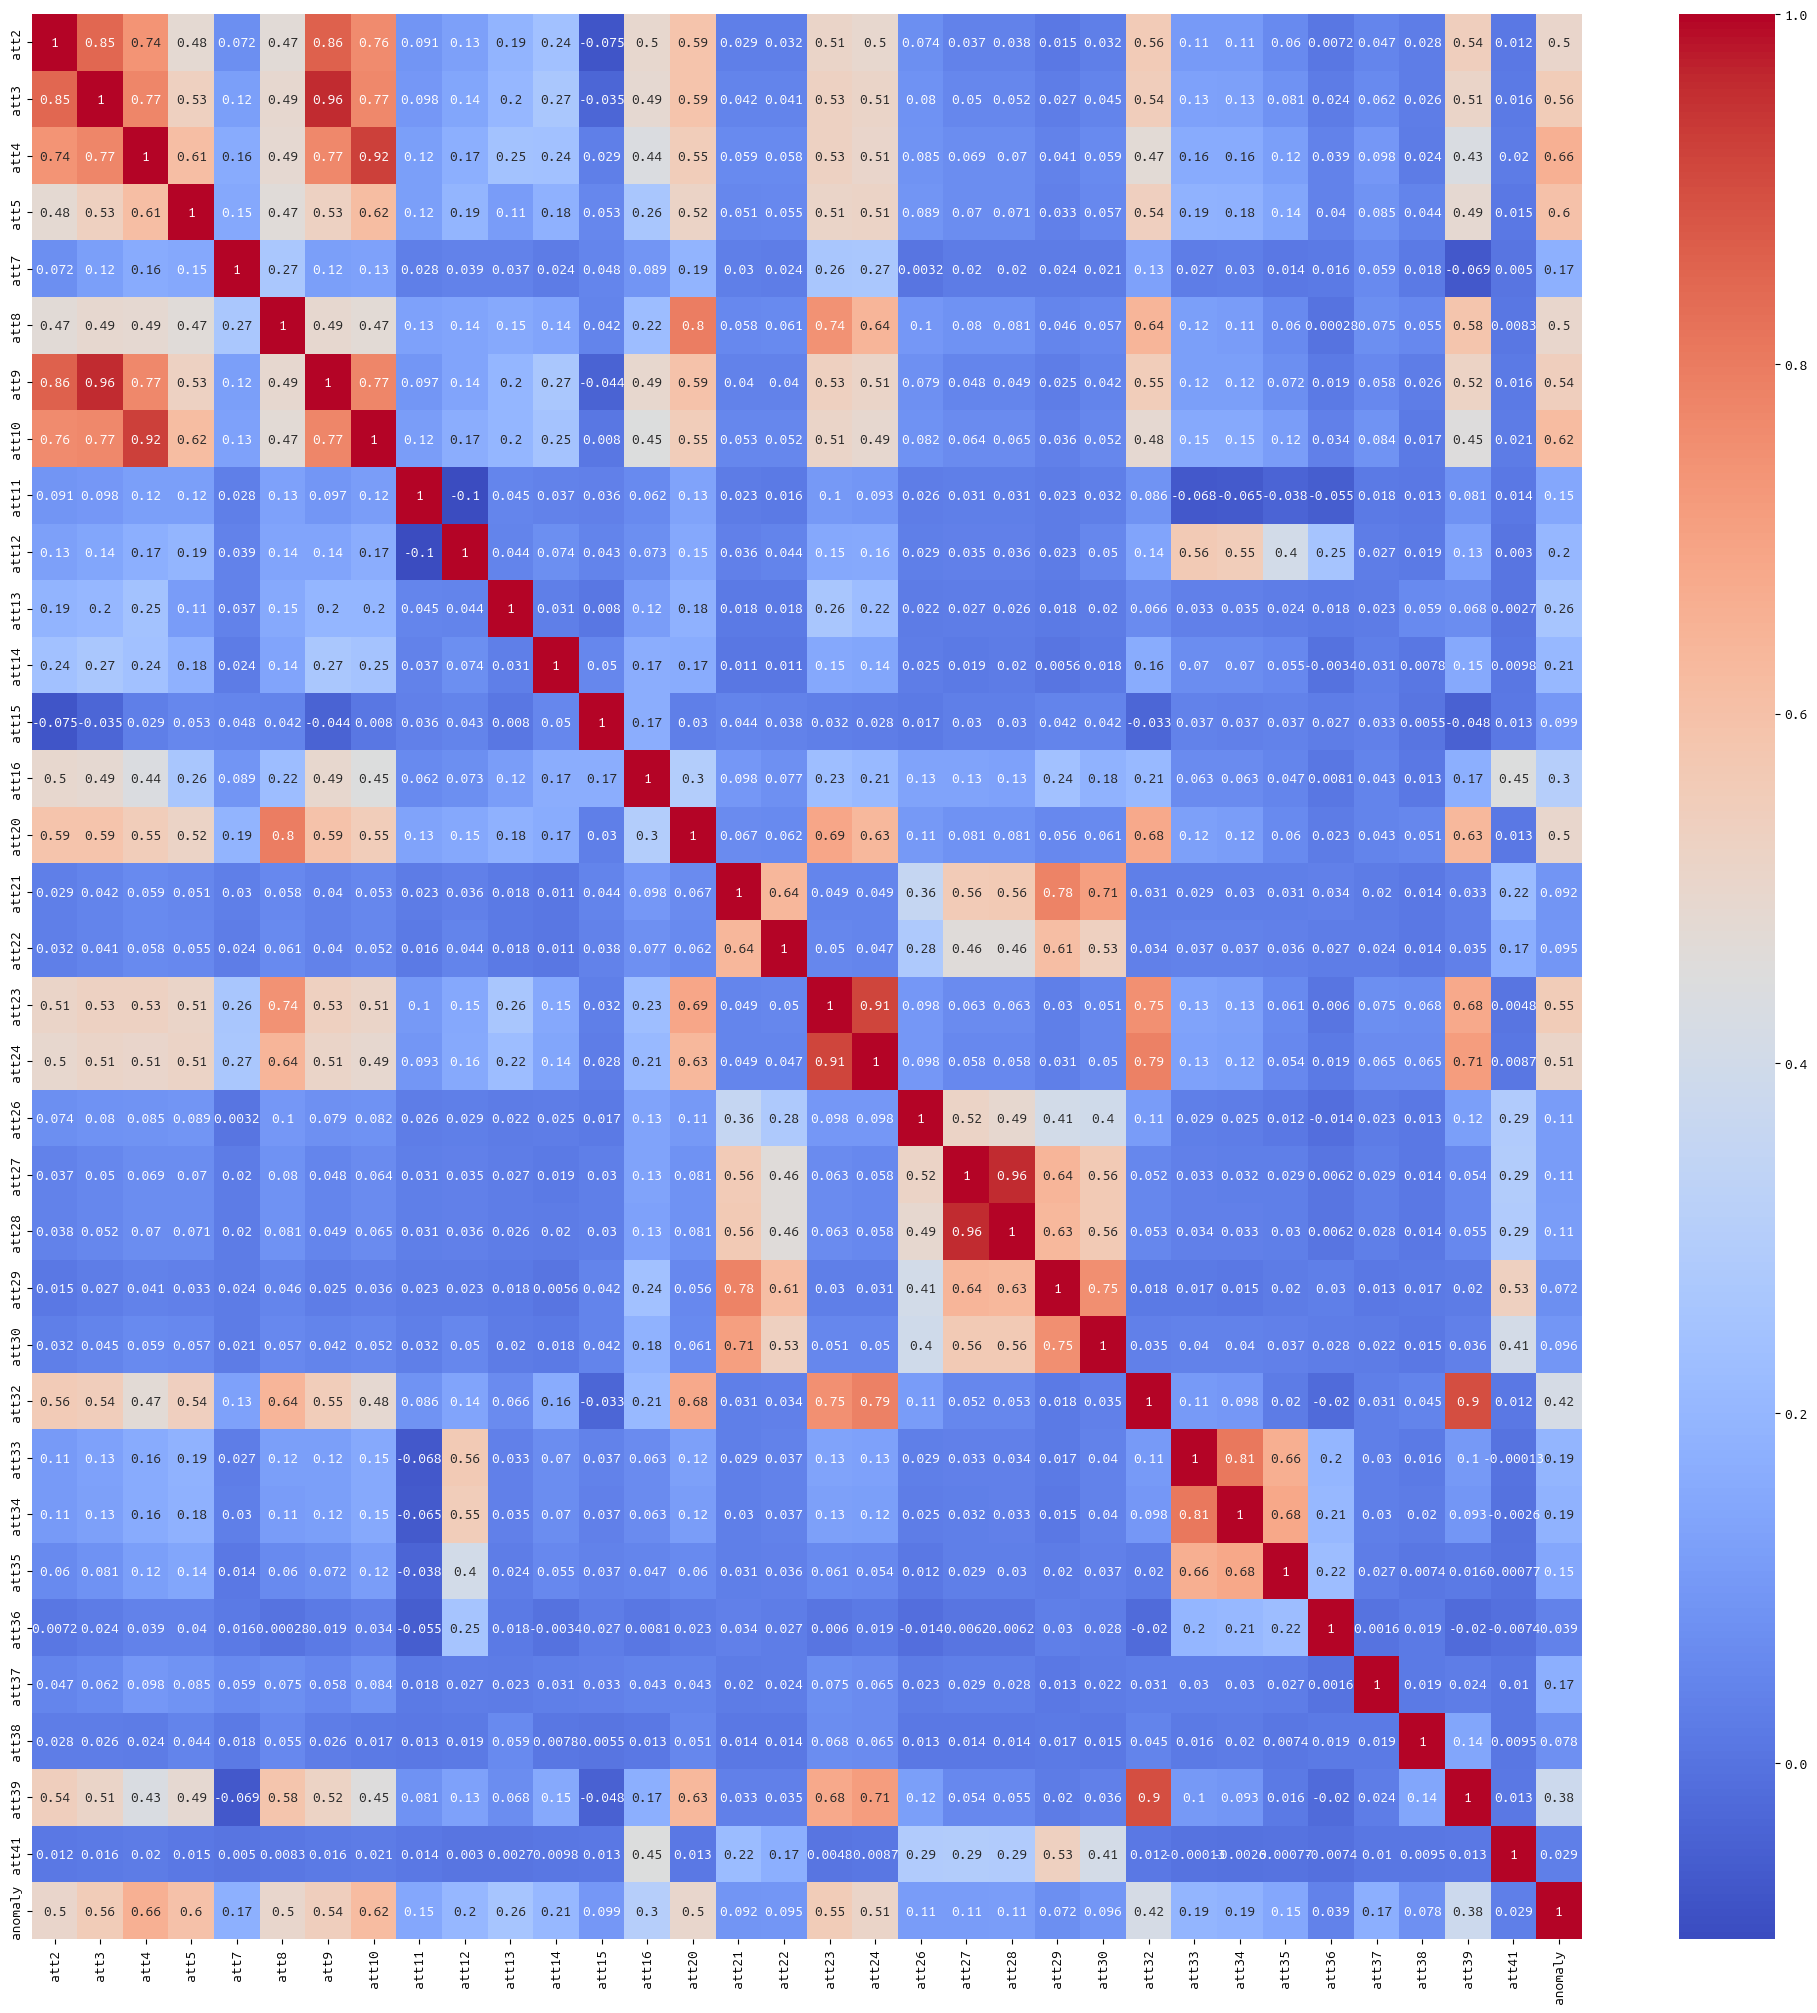

In [13]:
corr_matrix = census_data_df.corr()

plt.figure(figsize=(25, 25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

high_corr_pairs = np.where(np.abs(corr_matrix) > 0.8)
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) for x, y in zip(*high_corr_pairs) if x != y and x < y]
print(high_corr_pairs)

<h3>Removing Highly Correlated Features</h3>

In [14]:
to_remove = set()
for feature1, feature2 in high_corr_pairs:
    to_remove.add(feature2)

census_data_df_reduced = census_data_df.drop(columns=to_remove)
census_data_df = census_data_df_reduced
census_data_df.head()

,att2,att4,att5,att7,att8,att11,att12,att13,att14,att15,...,att29,att30,att32,att33,att35,att36,att37,att38,att41,anomaly
0,-1.444504,-1.156288,0.901203,0.190804,0.647968,0.170220,0.261709,-1.189878,-0.410626,0.129522,...,-0.100816,-0.049796,0.415608,0.108703,0.048044,0.169275,-0.059347,-0.108568,-1.025196,0
1,0.573165,-0.761160,0.901203,0.190804,-1.540823,0.170220,0.261709,-1.189878,-0.410626,-5.973451,...,0.521690,0.397596,0.415608,0.108703,0.048044,0.169275,-0.059347,-0.108568,0.975423,0
2,-1.444504,-1.156288,-0.482806,0.190804,0.647968,0.170220,0.261709,0.840423,-0.410626,0.129522,...,0.521690,0.397596,0.415608,0.108703,0.048044,0.169275,-0.059347,-0.108568,0.975423,0
3,-1.444504,-1.156288,-1.292203,0.190804,-1.540823,0.170220,0.261709,-1.189878,-0.410626,0.129522,...,0.521690,0.397596,-2.407381,0.108703,0.048044,0.169275,-0.059347,-0.108568,0.975423,0
4,-1.444504,-1.156288,-1.292203,0.190804,-1.540823,0.077024,0.261709,0.840423,-0.410626,0.129522,...,-0.100816,-0.049796,-2.407381,0.372619,0.048044,0.169275,-0.059347,-0.108568,-1.025196,0


<h3>Features Dimensionality Reduction using PCA(Principal Component Analysis)</h3>

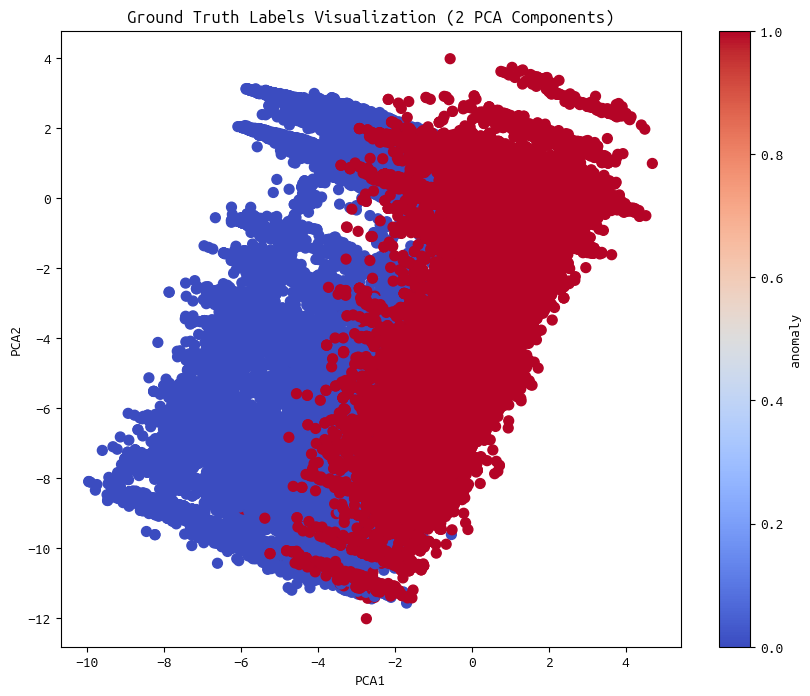

In [15]:
X = census_data_df.iloc[:, :-1]
y = (census_data_df['anomaly'] == 1).astype(int)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['anomaly'] = y

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['anomaly'], cmap='coolwarm', s=50)
plt.title("Ground Truth Labels Visualization (2 PCA Components)")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.colorbar(scatter, label='anomaly')
plt.show()

<h3>Predicting Anomalies using Random Forest and K-Nearest Neighbours Algorithms</h3>


--- Random Forest ---
Accuracy: 0.89
Confusion Matrix:
[[48343  7801]
 [ 4711 51432]]
Precision: 0.87, Recall: 0.92, F1-Score: 0.89
Matthews Correlation Coefficient (MCC): 0.78


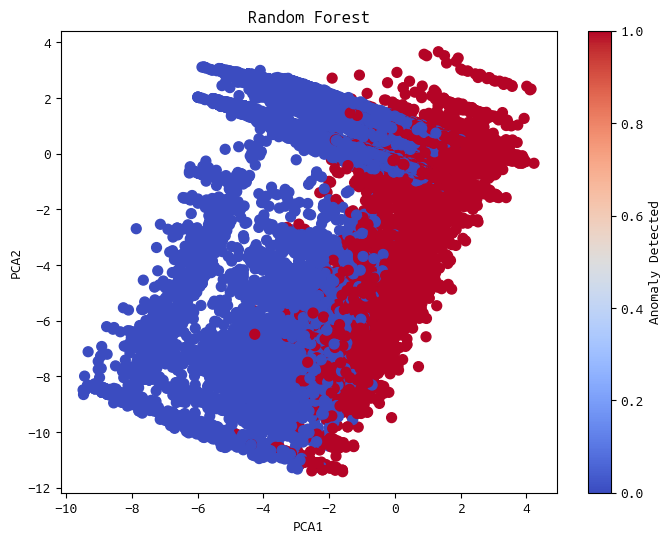


--- k-NN ---
Accuracy: 0.87
Confusion Matrix:
[[47172  8972]
 [ 6177 49966]]
Precision: 0.85, Recall: 0.89, F1-Score: 0.87
Matthews Correlation Coefficient (MCC): 0.73


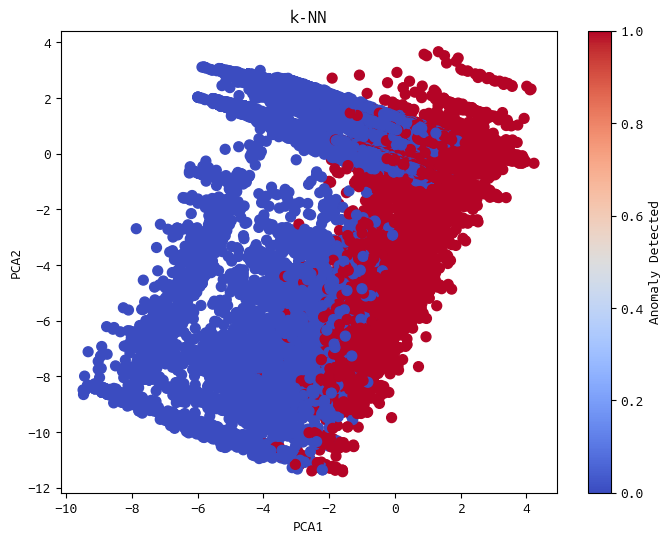

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "k-NN": KNeighborsClassifier(n_neighbors=5)
}

for model_name, model in models.items():
    print(f"\n--- {model_name} ---")
    
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.2f}")
    
    anomaly_labels = (y_pred == 1).astype(int)
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[:, 0], X_test[:, 1], c=anomaly_labels, cmap='coolwarm', s=50)
    plt.title(f'{model_name}')
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.colorbar(label='Anomaly Detected')
    plt.show()